## 뉴스빅데이터 분석 서비스, BIGKinds 활용

### 1. 소개 https://www.bigkinds.or.kr/

한국언론진흥재단의 무료 플랫폼으로 뉴스수집시스템, 분석시스템, 저장시스템 등으로 구성돼 있으며, 저장된 뉴스 분석 정보는 국민, 언론사, 학계, 스타트업 등이 활용할 수 있는 뉴스빅데이터 분석서비스 '빅카인즈(BIGKinds)'로 제공됨

#### 비정형 신문기사 -> 정형화된 토큰으로 제공함

In [ ]:
## 코렙 한글 차트
!sudo apt-get -qq -y install fonts-nanum > /dev/null
!sudo fc-cache -fv
!sudo rm ~/.cache/matplotlib -rf

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/

In [ ]:
## 런타임-런타임 다시시작
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/dataAnalysis

/content/drive/MyDrive/dataAnalysis


In [ ]:
import MyTf as mytf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## DTM 제작
docs = [
  '파이썬 차트 파이썬 머신러닝',
  '차트 파이썬 R 차트',
  'R 분석 시각화'
]

vocab = mytf.split(docs)
vocab = sorted(vocab)
result = []

for i in docs:
  result.append([])

  for j in vocab:
    result[-1].append(mytf.tf(j, i))


tf_ = pd.DataFrame(result, columns=vocab)
tf_

,R,머신러닝,분석,시각화,차트,파이썬
0,0,1,0,0,1,2
1,1,0,0,0,2,1
2,1,0,1,1,0,0


In [ ]:
## 행렬제작 사이킷런 CountVectorizer 패키지의 txtTDM = tdm.todense() 구현
## ---- tf Matrix ----
## [
##   [0 1 0 0 1 2]
##   [1 0 0 0 2 1]
##   [1 0 1 1 0 0]
## ]

todense = tf_.values
print(todense.shape)
print(todense)

feature = tf_.columns.values
print(feature)

print('--- TF 구하기(열단위 집계) ---')
countTDM = np.sum(todense, axis=0)
print(countTDM)
print(countTDM.shape)

print('------')
word_count = list(zip(feature, countTDM))
word_count

(3, 6)
[[0 1 0 0 1 2]
 [1 0 0 0 2 1]
 [1 0 1 1 0 0]]
['R' '머신러닝' '분석' '시각화' '차트' '파이썬']
--- TF 구하기(열단위 집계) ---
[2 1 1 1 3 3]
(6,)
------


[('R', 2), ('머신러닝', 1), ('분석', 1), ('시각화', 1), ('차트', 3), ('파이썬', 3)]

In [ ]:
## 방법1: numpy를 이용한 단어간 상관도 계산
import numpy as np
import pandas as pd

# np.corrcoef(tdm.todense(), rowvar=0) # 사이킷런 패키지 사용시 가능한 명령
word_corr = np.corrcoef(todense, rowvar=False) # rowvar 옵션을 0(False)와 1(True)로 하여서 행열단위의 계산 선택가능.
print(word_corr)

print('=' * 100)
df = pd.DataFrame(word_corr, columns=vocab)
df.index = vocab
df

[[ 1.        -1.         0.5        0.5        0.        -0.8660254]
 [-1.         1.        -0.5       -0.5        0.         0.8660254]
 [ 0.5       -0.5        1.         1.        -0.8660254 -0.8660254]
 [ 0.5       -0.5        1.         1.        -0.8660254 -0.8660254]
 [ 0.         0.        -0.8660254 -0.8660254  1.         0.5      ]
 [-0.8660254  0.8660254 -0.8660254 -0.8660254  0.5        1.       ]]


,R,머신러닝,분석,시각화,차트,파이썬
R,1.000000,-1.000000,0.500000,0.500000,0.000000,-0.866025
머신러닝,-1.000000,1.000000,-0.500000,-0.500000,0.000000,0.866025
분석,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
시각화,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
차트,0.000000,0.000000,-0.866025,-0.866025,1.000000,0.500000
파이썬,-0.866025,0.866025,-0.866025,-0.866025,0.500000,1.000000


In [ ]:
## 상관계수 직접 작성하기

x, y = np.array(tf_['R']), np.array(tf_['머신러닝'])
umerator = np.sum((x - np.mean(x)) * (y - np.mean(y)))
denominator = np.sqrt((np.sum((x - np.mean(x)) ** 2) * np.sum((y - np.mean(y)) ** 2)))
umerator / denominator

-1.0

In [ ]:
## 방법2: 판다스를 이용한 상관도 계산
## 판다스는 표본집단 계산입니다. n계산이 아니라 n-1 계산임

tf_.corr()

,R,머신러닝,분석,시각화,차트,파이썬
R,1.000000,-1.000000,0.500000,0.500000,0.000000,-0.866025
머신러닝,-1.000000,1.000000,-0.500000,-0.500000,0.000000,0.866025
분석,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
시각화,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
차트,0.000000,0.000000,-0.866025,-0.866025,1.000000,0.500000
파이썬,-0.866025,0.866025,-0.866025,-0.866025,0.500000,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


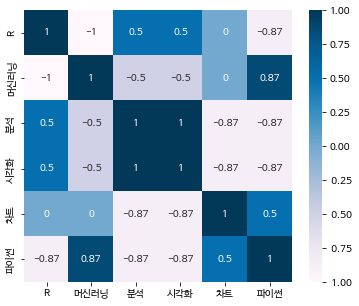

In [ ]:
## 히트맵을 이용한 상관도 출력

# R과 머신러닝이 -1의 상관도임
# R이라는 글자가 나올때는 머신러닝이라는 글자가 전혀 나오지 않는다는 뜻
plt.figure(figsize=(6, 5))
import seaborn as sns
sns.heatmap(tf_.corr(), annot=True, cmap='PuBu')

In [ ]:
word_corr[0]

array([ 1.       , -1.       ,  0.5      ,  0.5      ,  0.       ,
       -0.8660254])

In [ ]:
## 단어의 집합별 상관계수 값 리스트화 하기

words = feature
edges = []

for i in range(len(words)):
  for j in range(i + 1, len(words)):
    edges.append((words[i], words[j], word_corr[i, j]))

In [ ]:
edges

[('R', '머신러닝', -1.0),
 ('R', '분석', 0.4999999999999999),
 ('R', '시각화', 0.4999999999999999),
 ('R', '차트', 0.0),
 ('R', '파이썬', -0.8660254037844385),
 ('머신러닝', '분석', -0.5),
 ('머신러닝', '시각화', -0.5),
 ('머신러닝', '차트', 0.0),
 ('머신러닝', '파이썬', 0.8660254037844387),
 ('분석', '시각화', 0.9999999999999998),
 ('분석', '차트', -0.8660254037844385),
 ('분석', '파이썬', -0.8660254037844385),
 ('시각화', '차트', -0.8660254037844385),
 ('시각화', '파이썬', -0.8660254037844385),
 ('차트', '파이썬', 0.5)]

In [ ]:
## 상관도 내림차순으로 sort(reverse=True)
## 상관도 오름차순으로 sort(reverse=False)
edges = sorted(edges, key=lambda x: x[2], reverse=True)
edges[:5] # 상관도가 높은 상위 5개 자료보기

[('분석', '시각화', 0.9999999999999998),
 ('머신러닝', '파이썬', 0.8660254037844387),
 ('차트', '파이썬', 0.5),
 ('R', '분석', 0.4999999999999999),
 ('R', '시각화', 0.4999999999999999)]

In [ ]:
## 네트워크 그래프를 이용한 단어간 상관도 시각화

## 상관계수 시각화에 사용할 가중치를
## 상관도로 숫자로 작업하고자 함

# weight_list = []
# for x in edges:
#   weight_list.append(x[2])

# weight_list

weight_list = [x[2] for x in edges]
weight_list

[0.9999999999999998,
 0.8660254037844387,
 0.5,
 0.4999999999999999,
 0.4999999999999999,
 0.0,
 0.0,
 -0.5,
 -0.5,
 -0.8660254037844385,
 -0.8660254037844385,
 -0.8660254037844385,
 -0.8660254037844385,
 -0.8660254037844385,
 -1.0]

In [ ]:
## 상관계수 시각화에 사용할 연결된 노드 이름 쌍
edge_list = [(word1, word2) for word1, word2, weight in edges]
edge_list

[('분석', '시각화'),
 ('머신러닝', '파이썬'),
 ('차트', '파이썬'),
 ('R', '분석'),
 ('R', '시각화'),
 ('R', '차트'),
 ('머신러닝', '차트'),
 ('머신러닝', '분석'),
 ('머신러닝', '시각화'),
 ('R', '파이썬'),
 ('분석', '차트'),
 ('분석', '파이썬'),
 ('시각화', '차트'),
 ('시각화', '파이썬'),
 ('R', '머신러닝')]

In [ ]:
import networkx as nx

G = nx.Graph()
rank = 10

edge_set = set()
for word1, word2, weight in edges[:rank]:
  G.add_edge(word1, word2, weight=weight)
  edge_set.add((word1, word2))

edge_set

{('R', '분석'),
 ('R', '시각화'),
 ('R', '차트'),
 ('R', '파이썬'),
 ('머신러닝', '분석'),
 ('머신러닝', '시각화'),
 ('머신러닝', '차트'),
 ('머신러닝', '파이썬'),
 ('분석', '시각화'),
 ('차트', '파이썬')}

In [ ]:
## https://networkx.org/documentation/stable/tutorial.html
## https://95pbj.tistory.com/34 (한국어 사이트)

print('-> 노드갯수 출력')
print(G.number_of_nodes())

print()
print('-> 노드값 출력')
print(G.nodes)

print()
print('-> 엣지(word1, word2)값 출력')
print(G.edges)

## 디그리는 노드에서 분기하는 선의 갯수로서
## 여기서는 모든 노드와 연결되어 있음.(상관도를 모두 구함으로)
## 그래서 분석일떄는 5개의 노드(n-1)개의 디그리가 생김.
## 분석->시각화, 분석->머신러닝, 분석->파이썬, 분석->차트, 분석->R
print()
print('-> 디그리값 출력')
print(G.degree)

print()
print('-> 인접')
print(G.adj)

print()
print('-> edges의 갯수')
print(G.number_of_edges())

print()
print('-> 요약')
print(nx.info(G))

-> 노드갯수 출력
6

-> 노드값 출력
['분석', '시각화', '머신러닝', '파이썬', '차트', 'R']

-> 엣지(word1, word2)값 출력
[('분석', '시각화'), ('분석', 'R'), ('분석', '머신러닝'), ('시각화', 'R'), ('시각화', '머신러닝'), ('머신러닝', '파이썬'), ('머신러닝', '차트'), ('파이썬', '차트'), ('파이썬', 'R'), ('차트', 'R')]

-> 디그리값 출력
[('분석', 3), ('시각화', 3), ('머신러닝', 4), ('파이썬', 3), ('차트', 3), ('R', 4)]

-> 인접
{'분석': {'시각화': {'weight': 0.9999999999999998}, 'R': {'weight': 0.4999999999999999}, '머신러닝': {'weight': -0.5}}, '시각화': {'분석': {'weight': 0.9999999999999998}, 'R': {'weight': 0.4999999999999999}, '머신러닝': {'weight': -0.5}}, '머신러닝': {'파이썬': {'weight': 0.8660254037844387}, '차트': {'weight': 0.0}, '분석': {'weight': -0.5}, '시각화': {'weight': -0.5}}, '파이썬': {'머신러닝': {'weight': 0.8660254037844387}, '차트': {'weight': 0.5}, 'R': {'weight': -0.8660254037844385}}, '차트': {'파이썬': {'weight': 0.5}, 'R': {'weight': 0.0}, '머신러닝': {'weight': 0.0}}, 'R': {'분석': {'weight': 0.4999999999999999}, '시각화': {'weight': 0.4999999999999999}, '차트': {'weight': 0.0}, '파이썬': {'weight': -0.8660254037844

In [ ]:
tmp = np.sum(tf_.values, axis=0)
print(tmp)

nsize = tmp
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))
print(nsize)

[2 1 1 1 3 3]
[1000.    0.    0.    0. 2000. 2000.]


In [ ]:
tf_

,R,머신러닝,분석,시각화,차트,파이썬
0,0,1,0,0,1,2
1,1,0,0,0,2,1
2,1,0,1,1,0,0


[('분석', '시각화', 0.9999999999999998), ('머신러닝', '파이썬', 0.8660254037844387), ('차트', '파이썬', 0.5), ('R', '분석', 0.4999999999999999), ('R', '시각화', 0.4999999999999999), ('R', '차트', 0.0), ('머신러닝', '차트', 0.0), ('머신러닝', '분석', -0.5), ('머신러닝', '시각화', -0.5), ('R', '파이썬', -0.8660254037844385)]


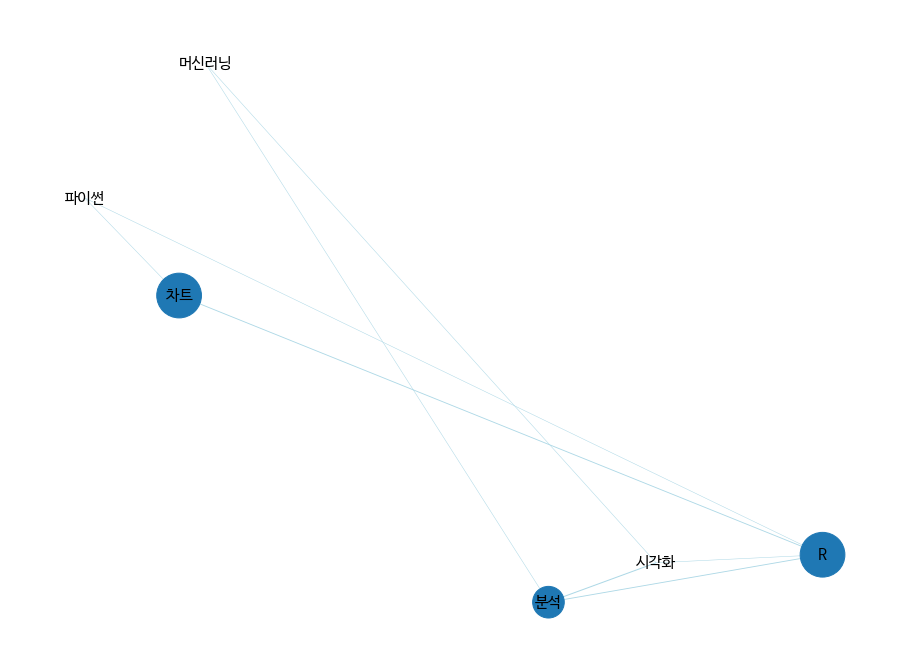

In [ ]:
## 상관계수 시각화
## 그래프를 그리기 위해서 준비해야 하는건
## 몇개의 노드를 준비할지
## 그 노드에서 몇개의 디그리가 나올지
## 그리고 엣지(노드와 노드의 쌍)별 거리는 무엇으로 할지

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.figure(figsize=(16, 12))
plt.axis('off')

fname = fm.FontProperties().get_name()

print(edges[:rank])
nx.draw_networkx(
  G,
  with_labels=True,
  font_family=fname,
  width=weight_list[:rank],
  edge_color='lightblue',
  font_size=15,
  node_size=nsize
)

In [ ]:
## 장바구니 분석

## 2차원리스트 셋으로 변환뒤, df 제작
docs = [
  '파이썬 차트 파이썬 머신러닝',
  '차트 파이썬 R 차트',
  'R 분석 시각화'
]
dataset = [i.split() for i in docs]

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te.fit(dataset)
print(te.columns_)

te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

['R', '머신러닝', '분석', '시각화', '차트', '파이썬']


,R,머신러닝,분석,시각화,차트,파이썬
0,False,True,False,False,True,True
1,True,False,False,False,True,True
2,True,False,True,True,False,False


In [ ]:
## 지지도 하한선 정하기
## item 조합 갯수가 특정갯수 이상의 item만 추출

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
print(frequent_itemsets[:3])

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets['length'] >= 2]

    support itemsets
0  0.666667      (R)
1  0.333333   (머신러닝)
2  0.333333     (분석)


,support,itemsets,length
6,0.333333,"(R, 분석)",2
7,0.333333,"(R, 시각화)",2
8,0.333333,"(R, 차트)",2
9,0.333333,"(R, 파이썬)",2
10,0.333333,"(차트, 머신러닝)",2
11,0.333333,"(파이썬, 머신러닝)",2
12,0.333333,"(분석, 시각화)",2
13,0.666667,"(차트, 파이썬)",2
14,0.333333,"(R, 시각화, 분석)",3
15,0.333333,"(R, 파이썬, 차트)",3


## 실전

In [ ]:
import pandas as pd

df = pd.read_excel('./data/News_2018.xlsx')
df.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,2.100101e+06,20181031,매일경제,이덕주,"미스터피자, 천연발효 생도",경제>산업_기업,경제>자동차,경제>서비스_쇼핑,NaN,NaN,NaN,NaN,NaN,MP그룹,"미스터피자,천연,발효,생도,MP,그룹,미스터피자,전국,매장,천연발효종,생도,사용,피...","미스터피자,발효종,천연발효종,사워도,고객들,2개월,직영점,천연효모,천연발효빵,mp,...",MP그룹 미스터피자가 11월 1일부터 전국 매장에서 '천연발효종을 넣은 생도'를 사...,http://news.mk.co.kr/newsRead.php?year=2018&no...,NaN
1,2.100101e+06,20181031,매일경제,NaN,[Find Dining] 유니크 다이닝,문화>요리_여행,문화>출판,문화>미술_건축,NaN,NaN,NaN,NaN,"쓰촨,사천식,중구,용산구,중국,시추안,쓰촨성,해산,사천,홍대,한국,서울시,이태원,스...","RYSE호텔,소고기,타파스,한남대,까르보나라 파스타,마라,쓰촨성,타르틴,마라연두부,...","유니크,다이닝,짜장면,중국집,음식,속설,정답,요즘,디자인,식당,음식맛,대세,식사,가...","1만,타르틴,사천식,레드문,쓰촨성,2만,샹라,시추안,마리,타파스,이태원,쓰촨,홍대앞...",한때 짜장면 맛있는 중국집은 모든 음식이 맛있다는 속설이 있었고 대략 정답이었다. ...,http://news.mk.co.kr/newsRead.php?year=2018&no...,NaN
2,2.100101e+06,20181031,매일경제,이덕주,"미스터피자, 모든 피자에 `천연발효종 넣은 생도우` 사용",경제>산업_기업,경제>유통,경제>자동차,NaN,NaN,NaN,NaN,숙성,MP그룹,"미스터피자,피자,천연발효종,생도우,사용,MP,그룹,미스터피자,전국,매장,천연발효종,...","미스터피자,발효종,천연발효종,고급베이커리,사워도,수타,77번,천연발효빵,2개월,직영...",MP그룹 미스터피자가 11월 1일부터 전국 매장에서 '천연발효종 넣은 생도우'를 사...,http://news.mk.co.kr/newsRead.php?year=2018&no...,NaN
3,2.100101e+06,20181031,매일경제,이미연,"대우산업개발, 서산테크노벨리 어린이 그림 그리기 대회 개최",문화>전시_공연,지역>전북,지역>충남,NaN,NaN,NaN,NaN,"서산,서산시,예천동,서산테크노밸리,수변공원","초록우산어린이재단,서산시청,한국미술협회","대우산업개발,그림,서산테크노벨리,어린이,대회,개최,대우산업개발,서산시청,다음달,초록...","대우산업개발,서산,아이들,서산시,다음달,서산테크노벨리,한국미술협회,온라인,1번지,풍...","대우산업개발은 다음달 3일 서산시청과 초록우산어린이재단, 한국미술협회 서산지부의 후...",http://news.mk.co.kr/newsRead.php?year=2018&no...,NaN
4,2.100101e+06,20181031,매일경제,이덕주,베이커리 vs 커피전문점 경계허물기 영토전쟁,경제>유통,경제>서비스_쇼핑,NaN,NaN,NaN,NaN,"조던,크리스,백종원,한미영","강릉,서울,강남역,시애틀,한국,광화문,신사역,인도,공덕,미국,밀라노,코엑스,용산구,...","프랜차이즈,커피앳웍스,할리스커피,빽다방,정부,엠아이커피,프린치,연세세브란스빌딩,푸드...","베이커리,vs,커피,전문점,경계,영토전쟁,시애틀,미국,프린치,Princi,베이커리,...","커피전문점,프린치,스타벅스,전문점,관계자,던킨도너츠,빽다방,빵집,파리바게뜨,타르틴베이커리",지난 7월 미국 시애틀에 ‘프린치(Princi)’라는 새로운 베이커리가 생겼다. 그...,http://news.mk.co.kr/newsRead.php?year=2018&no...,NaN


In [ ]:
data = df['특성추출(가중치순 상위 50개)']

docs = [doc.split(',') for doc in data[:5]]
docs

unique_list = sorted(list(set(np.concatenate(np.array(docs)))))
unique_list

## DTM 계산

## 컬럼자료의 출현횟수를 계산함.
## [방법1] 직접작성

import pandas as pd
result = []

for col in unique_list:
  list_ = []
  for row in docs:
    cnt = 0

    for item in row:
      if col == item:
        cnt += 1
    
    list_.append(cnt)
  result.append(list_)

tf_ = pd.DataFrame(result)
print(tf_)

tf_ = tf_.T
print(tf_)

tf_.columns = unique_list
display(tf_)

print(np.sum(tf_.values, axis=1))
print(np.sum(tf_.values, axis=0))

     0  1  2  3  4
0    0  1  0  0  0
1    0  0  0  1  0
2    1  0  1  0  0
3    0  1  0  0  0
4    0  1  0  0  0
..  .. .. .. .. ..
99   1  0  1  0  0
100  0  0  0  1  0
101  0  1  0  0  0
102  0  1  0  0  0
103  1  0  1  0  0

[104 rows x 5 columns]
   0    1    2    3    4    5    6    7    8    9    ...  94   95   96   97   \
0    0    0    1    0    0    0    1    0    0    1  ...    0    0    0    1   
1    1    0    0    1    1    0    0    1    1    0  ...    0    0    0    0   
2    0    0    1    0    0    1    1    0    0    1  ...    0    0    0    1   
3    0    1    0    0    0    0    0    0    0    0  ...    0    1    1    0   
4    0    0    0    0    0    0    0    0    0    0  ...    1    0    0    0   

   98   99   100  101  102  103  
0    0    1    0    0    0    1  
1    0    0    0    1    1    0  
2    0    1    0    0    0    1  
3    0    0    1    0    0    0  
4    1    0    0    0    0    0  

[5 rows x 104 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


,1만,1번지,2개월,2만,4000원,77번,mp,가정식,게짬뽕,고객,...,파리바게뜨,펄린,풍선아트,프랜차이즈,프린치,피자,한국미술협회,한남동,홍대앞,효모
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,1,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


[29 26 40 26 10]
[1 1 2 1 1 1 2 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 2 1 1 1 1
 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 2 1 1 2 1 2 2 2 2 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 2]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


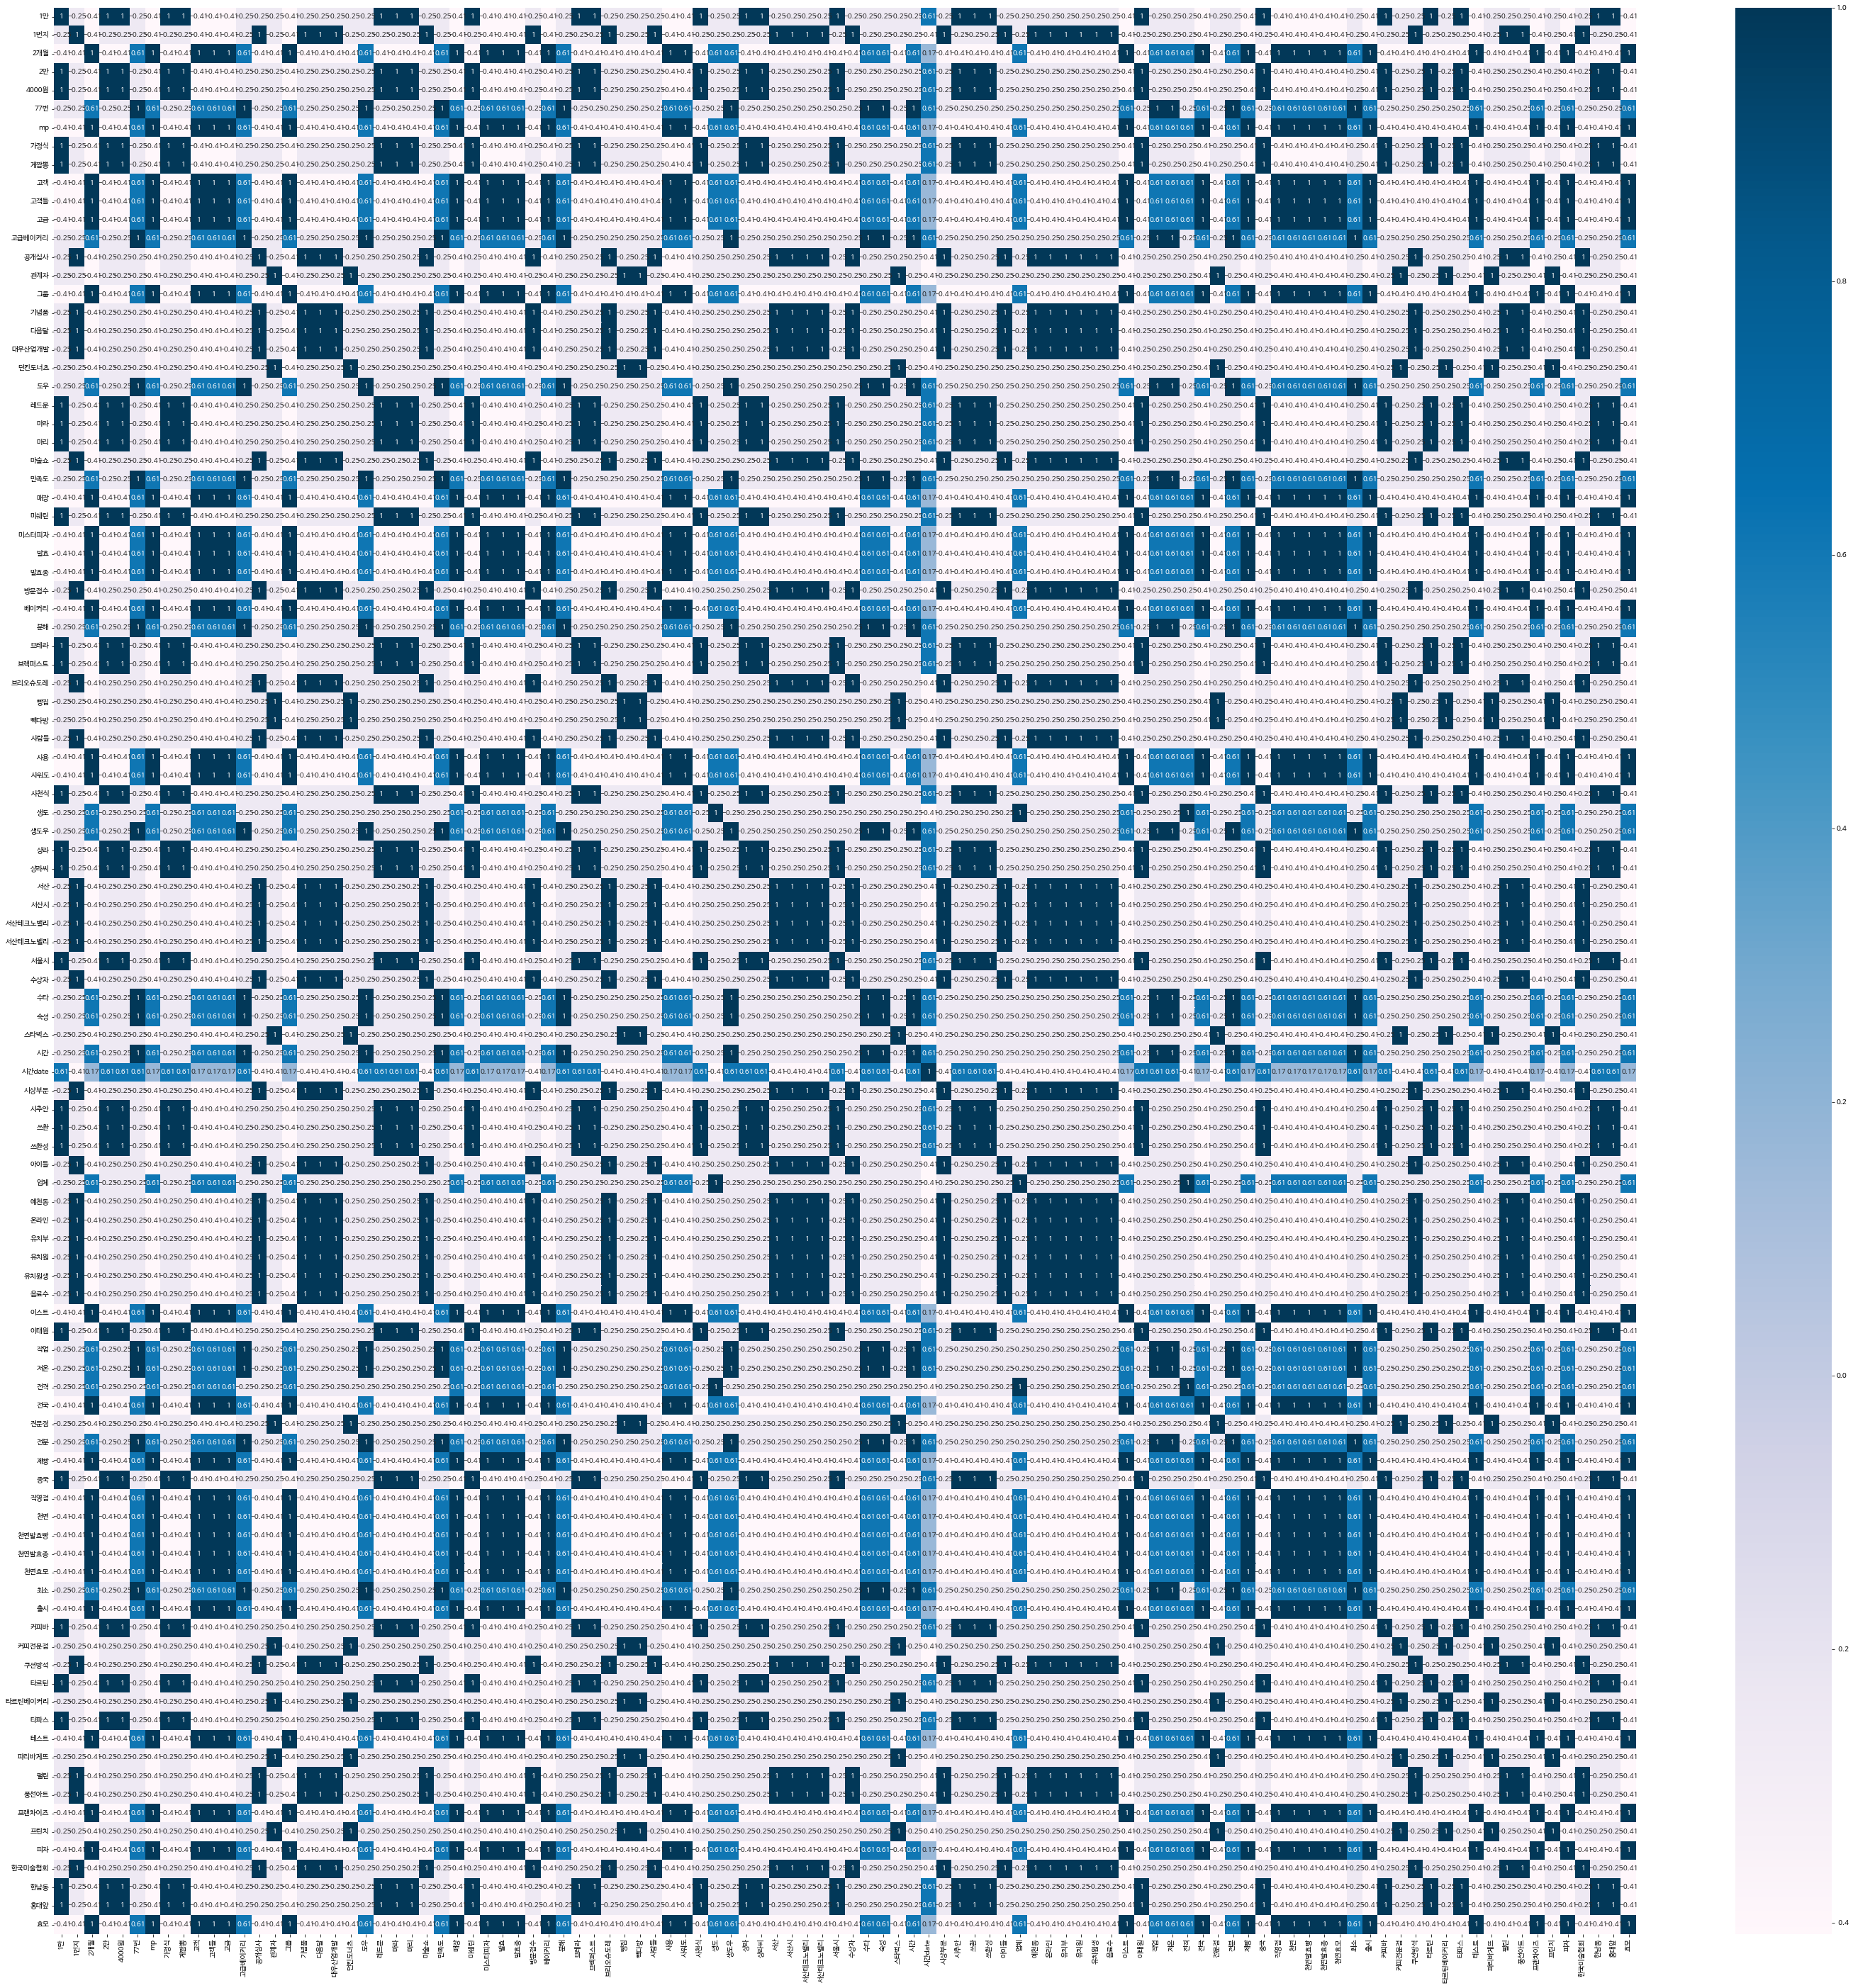

In [ ]:
## 히트맵을 이용한 상관도 출력

plt.figure(figsize=(50, 50))

import seaborn as sns
sns.heatmap(tf_.corr(), annot=True, cmap='PuBu')

In [ ]:
## 연관분석, 상관도분석에서 외부 데이터의 종류와 데이터셋의 상황에 따라
## 불러온 자료를 작업형식에 맞추는 작업은 고저오디어 있지 않음.

## 미션
## 상관계수를 함수로 작성하여 사용
## 작성된 함수를 모듈로 작성하여서 import 하여 사용
## 상관계수연관분석, 네트워크 그래프 등 필요한 작업을 모듈로 작성하여 import 하여 사용
## 작업시 class 모듈도 작성해봄

## 빅카인즈 2018.csv ~ 2021.csv 자료를 비교하고 인사이트를 찾아봄